In [1]:
# Import the dependancies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

%matplotlib inline

In [2]:
# Read the data

data = pd.read_csv('/home/ali/Cellula/Task_4/final_internship_data.csv')

In [3]:
# Printing the first 5 rows of the data

data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
## check for number of unique values in every column , if < 10 then its categorical.
for column in data.columns:
    if (data[column].nunique()) <= 10:
        print(data[column].value_counts())
        print("\n")

Car Condition
Very Good    125312
Bad          124978
Good         124968
Excellent    124742
Name: count, dtype: int64


Weather
sunny     100433
cloudy    100062
rainy      99972
stormy     99955
windy      99578
Name: count, dtype: int64


Traffic Condition
Congested Traffic    166847
Dense Traffic        166584
Flow Traffic         166569
Name: count, dtype: int64


passenger_count
1    346009
2     73908
5     35322
3     21761
4     10614
6     10590
0      1796
Name: count, dtype: int64


weekday
4    77224
5    76212
3    74778
2    72230
1    69932
6    65387
0    64237
Name: count, dtype: int64


year
2012    80225
2011    79529
2013    78034
2009    77002
2010    75791
2014    74608
2015    34811
Name: count, dtype: int64




In [5]:
# Dropping coasting features 

data.drop(columns = ['User ID', 'User Name', 'Driver Name', 'pickup_datetime', 'pickup_longitude',
                             'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1 , inplace = True)

In [6]:
data.shape

(500000, 18)

In [7]:
# Checking if any data is missing

print(data.isnull().sum())

Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


In [8]:
# Dropping missing data

data = data.dropna()
data.shape

(499995, 18)

In [9]:
# Data overall analysis

data.describe()

,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [10]:
# Data information

print(data.dtypes)

Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object


In [11]:
# Checking for duplicate data
print(sum(data.duplicated()))
# Droping duplicate data
data.drop_duplicates(inplace = True)

0


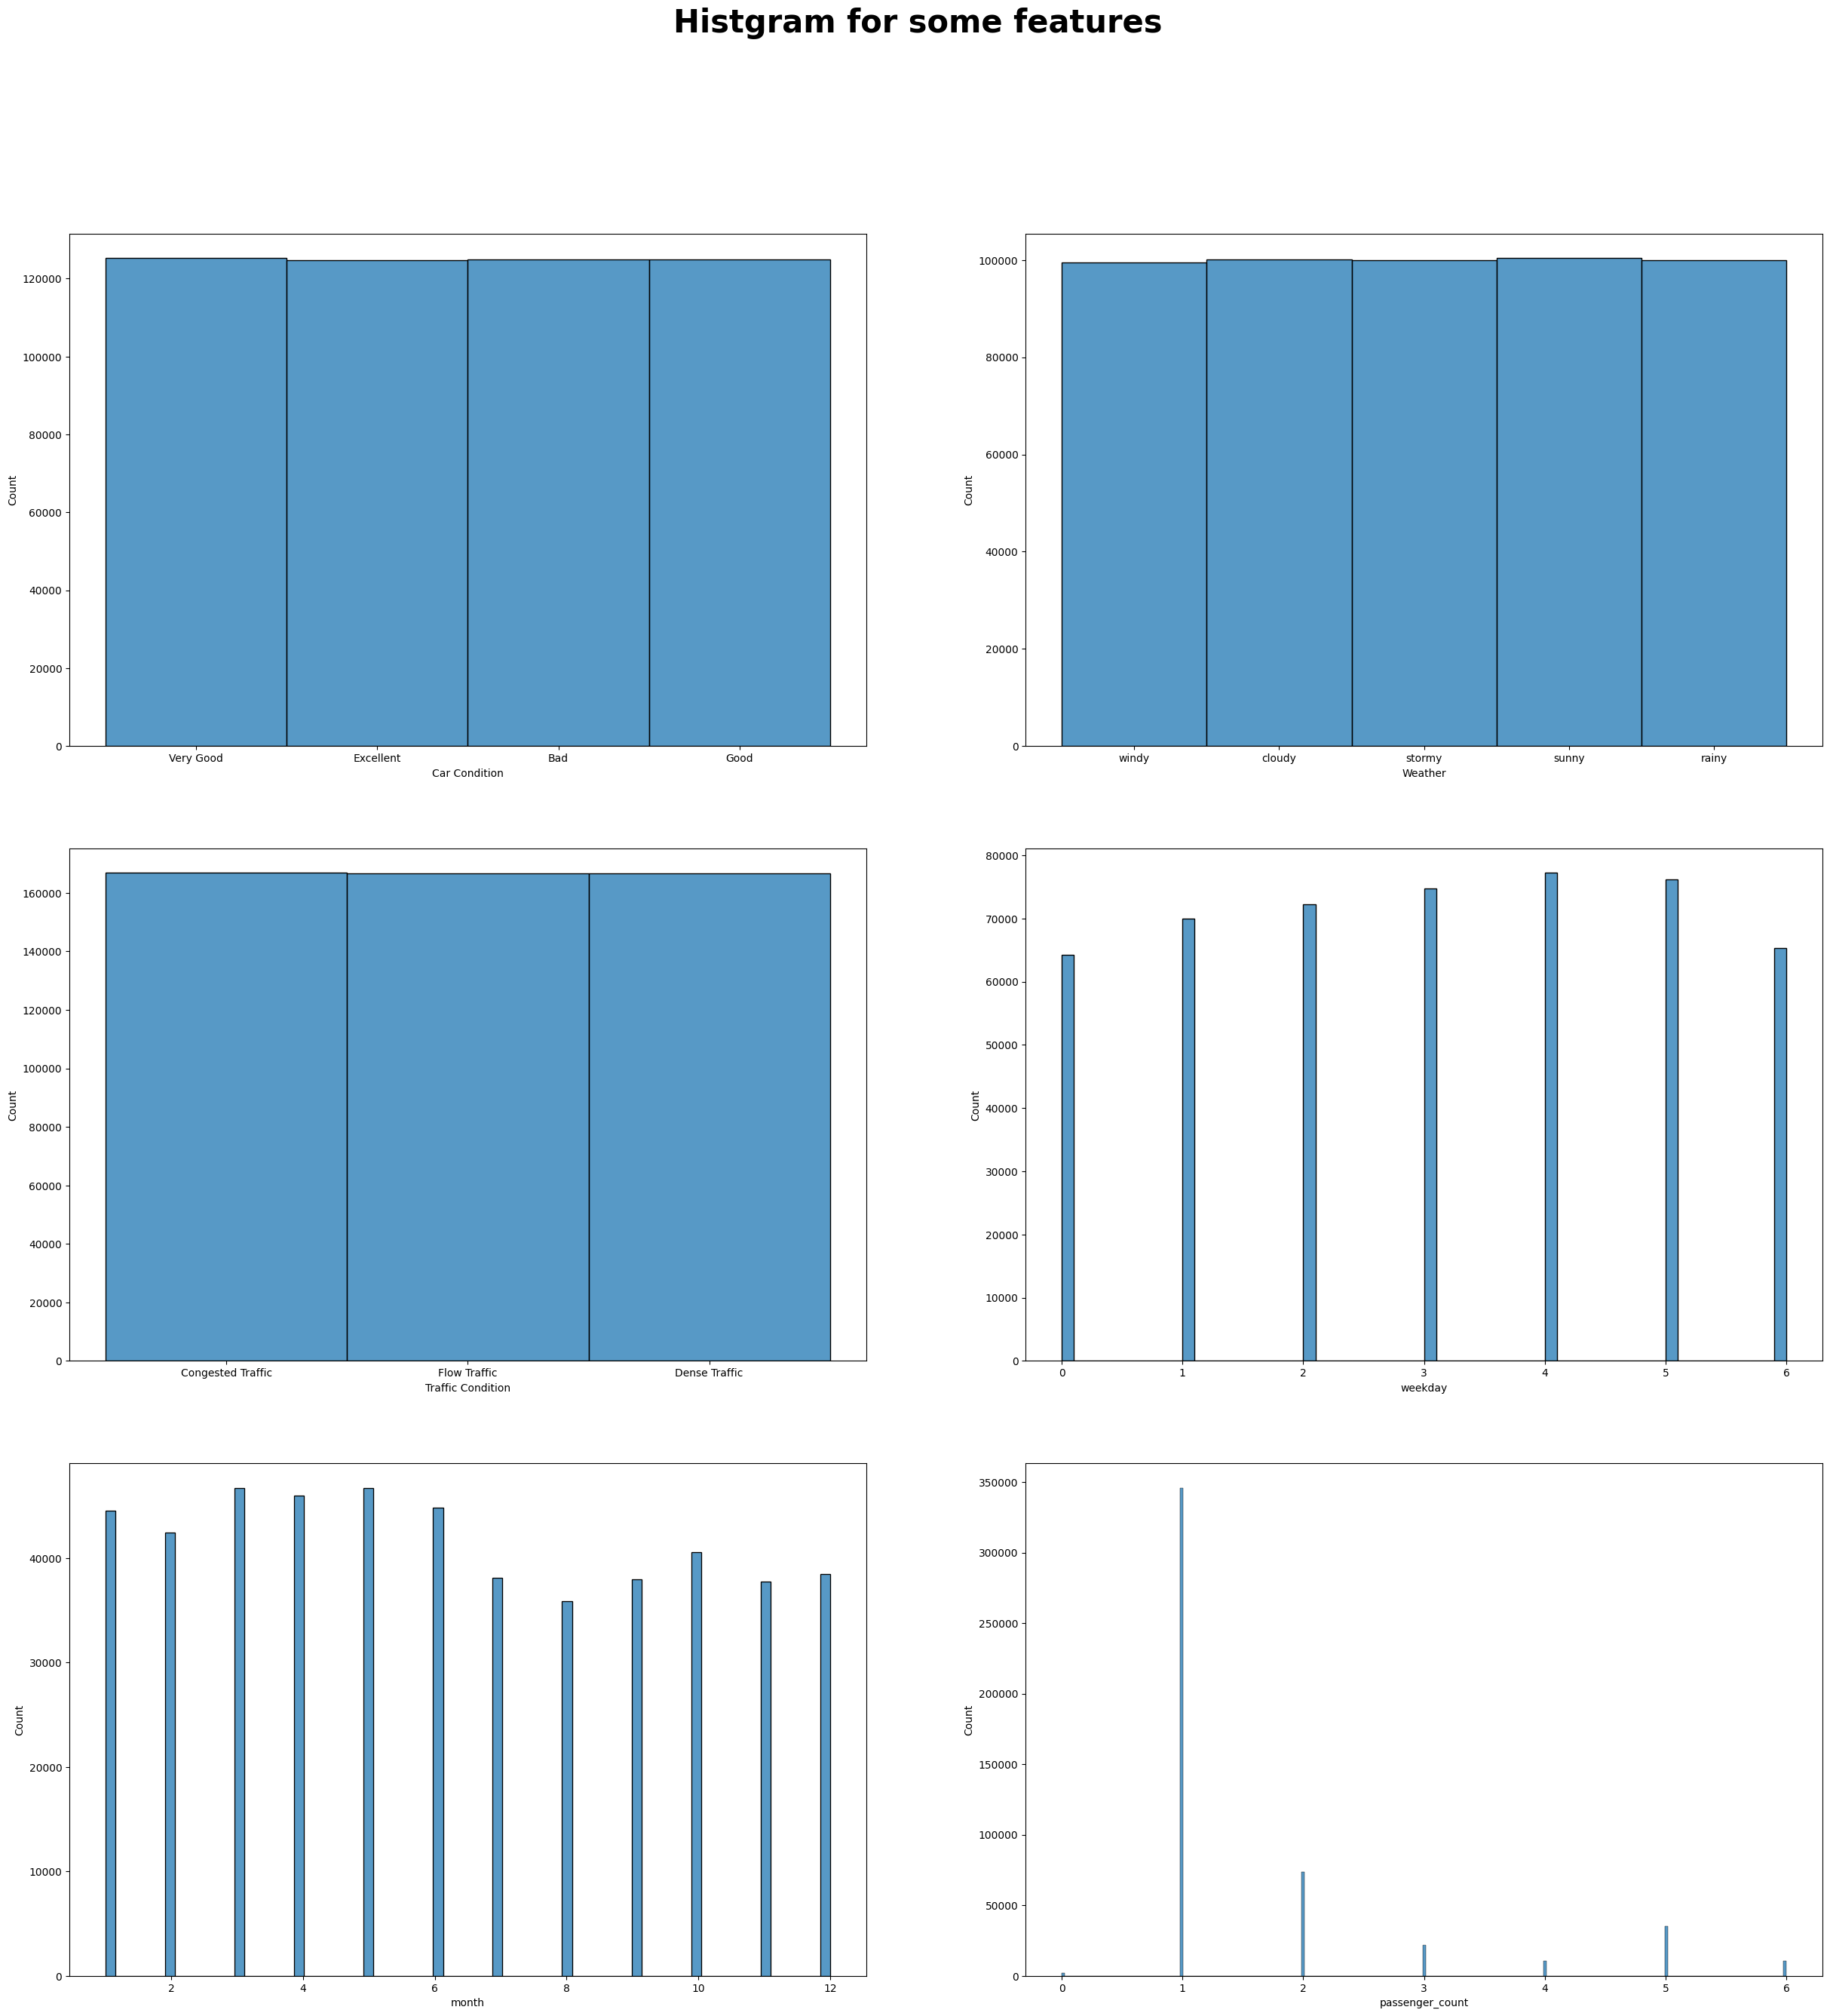

In [12]:
# Plotting histgram for some features

features = ['Car Condition', 'Weather', 'Traffic Condition', 'weekday', 'month', 'passenger_count']
counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for some features",fontweight="bold", fontsize=30)
for feature in features:
    counter = counter + 1
    plt.subplot(3,2,counter)
    sns.histplot(data[feature])

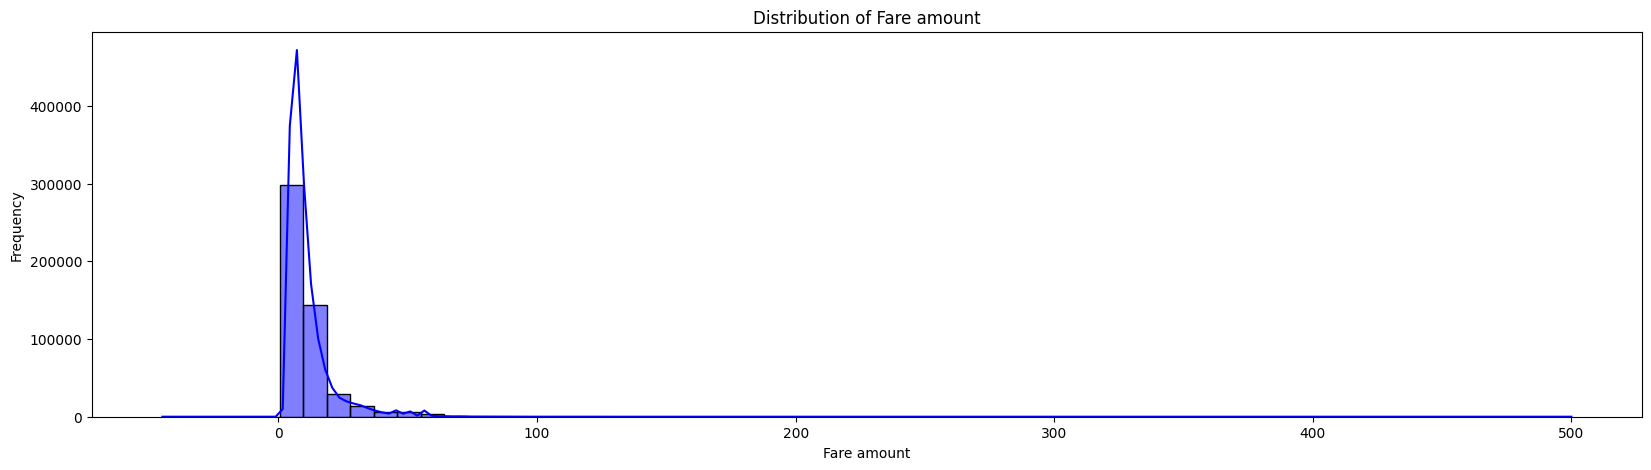

In [13]:

plt.figure(figsize=(20, 5))

# Histogram with KDE
sns.histplot(data['fare_amount'], bins=60, kde=True, color='blue')
plt.title('Distribution of Fare amount')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')
plt.show()


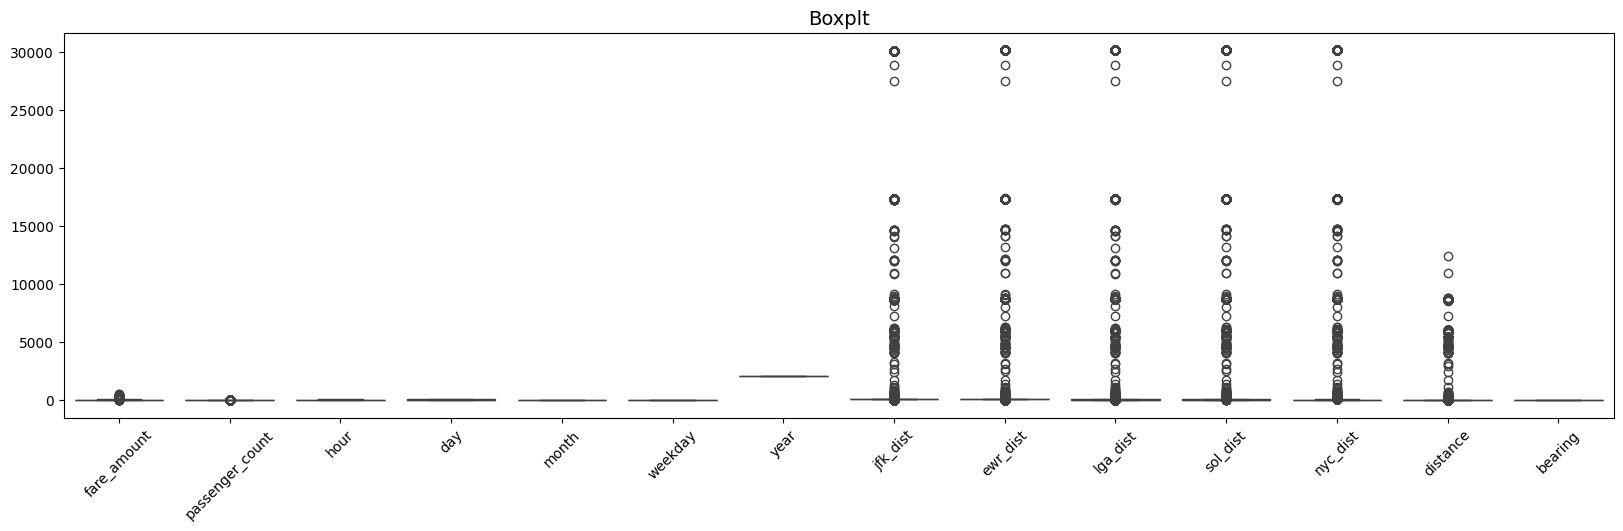

In [14]:
# plot outliers before treating 
plt.figure(figsize=(20, 5))  # Wider figure to fit all columns
sns.boxplot(data = data)
plt.xticks(rotation = 45)  # Rotate x-axis labels for clarity
plt.title("Boxplt", fontsize = 14)
plt.show()

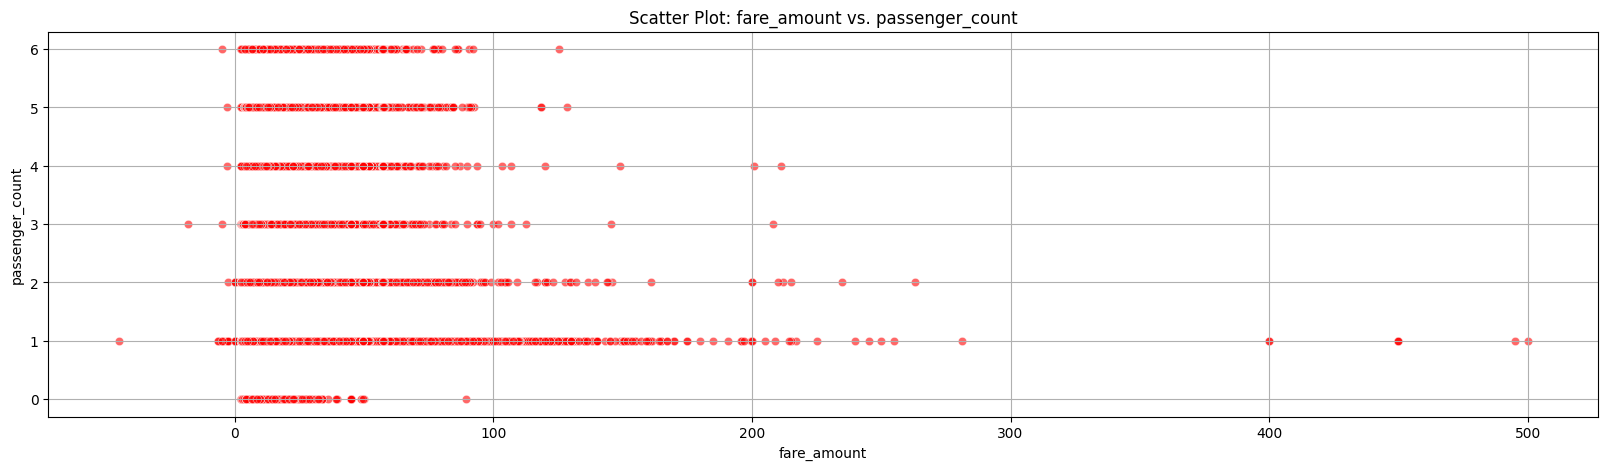

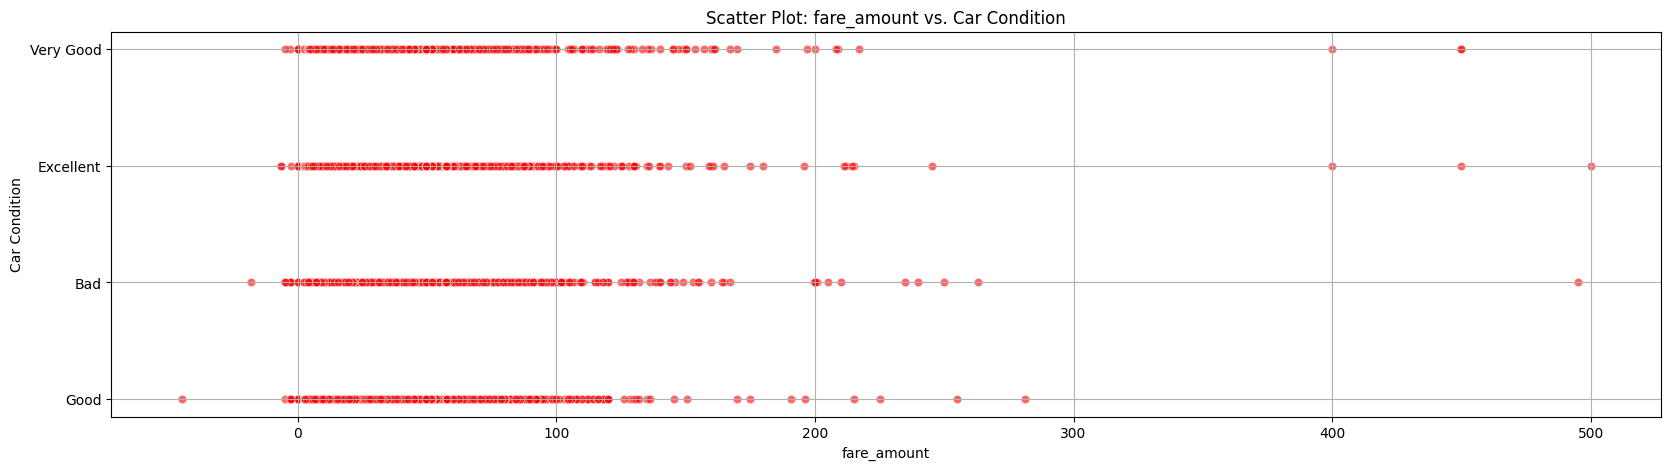

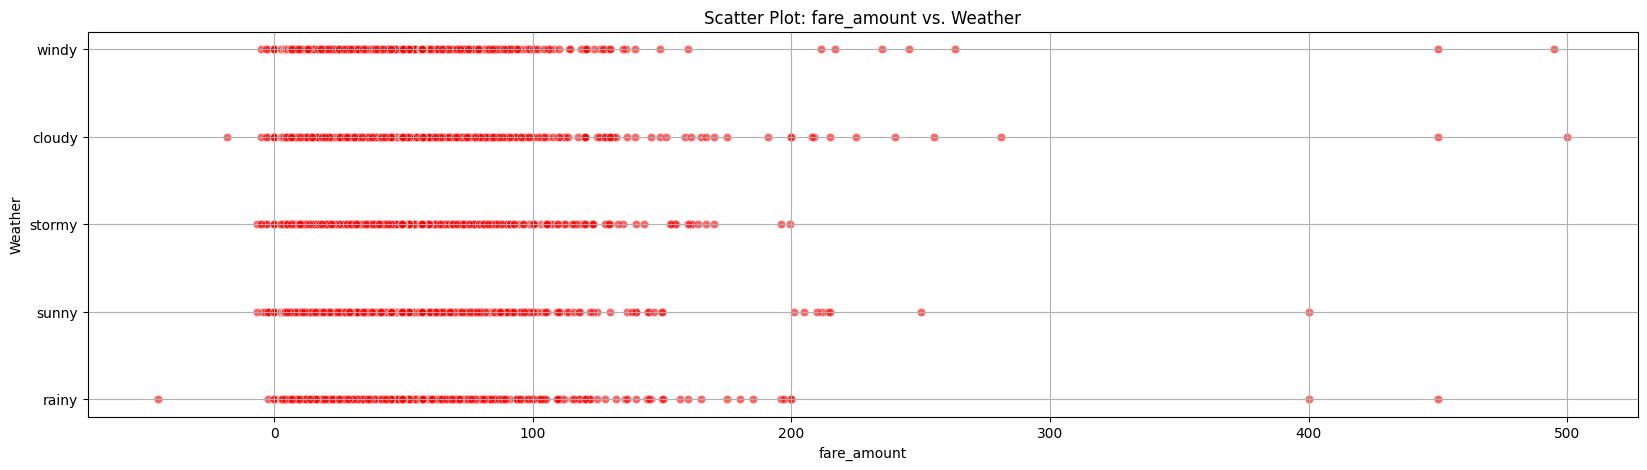

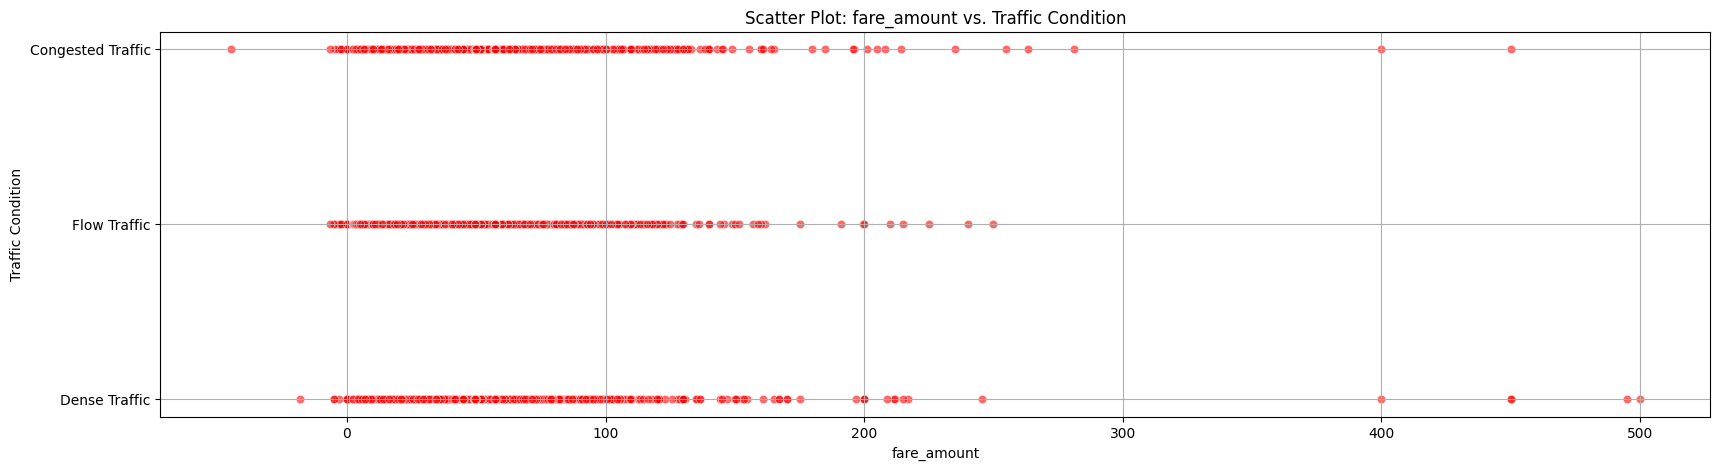

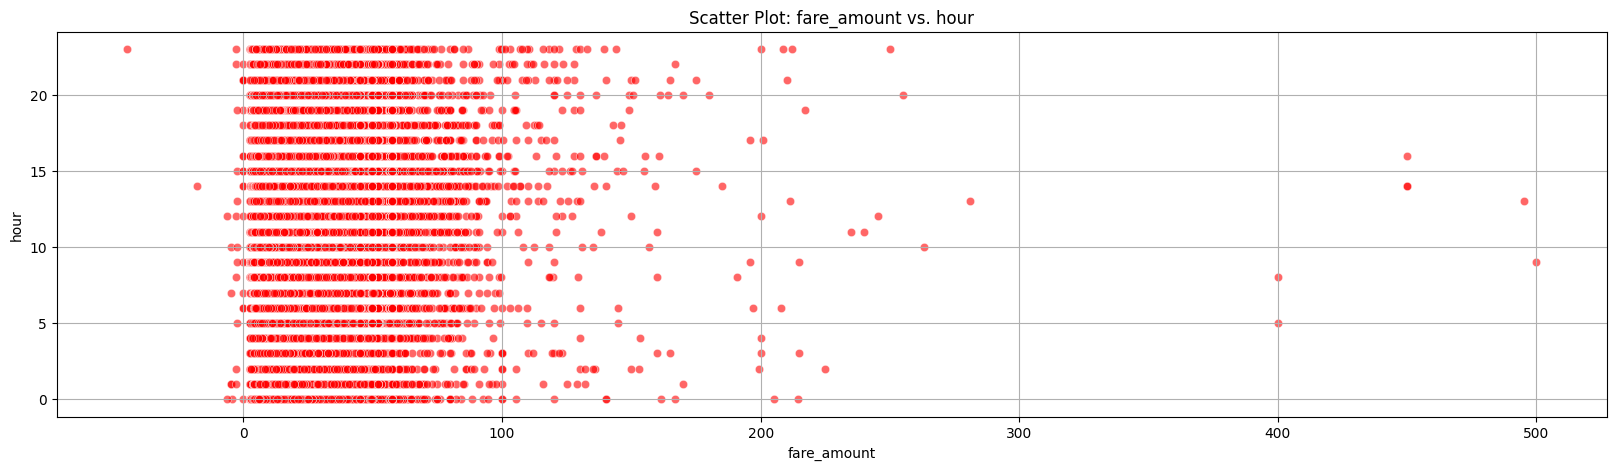

In [15]:
# Plotting scatter plot for some features agaist Fare amount

features = ['passenger_count', 'Car Condition', 'Weather', 'Traffic Condition', 'hour']

for feature in features:

    plt.figure(figsize=(20, 5))
    sns.scatterplot(x=data['fare_amount'], y=data[feature], alpha=0.6, color='red')

    # Titles and labels
    plt.title('Scatter Plot: fare_amount vs. {}'.format(feature))
    plt.xlabel('fare_amount')
    plt.ylabel(feature)
    plt.grid(True)

    plt.show()  

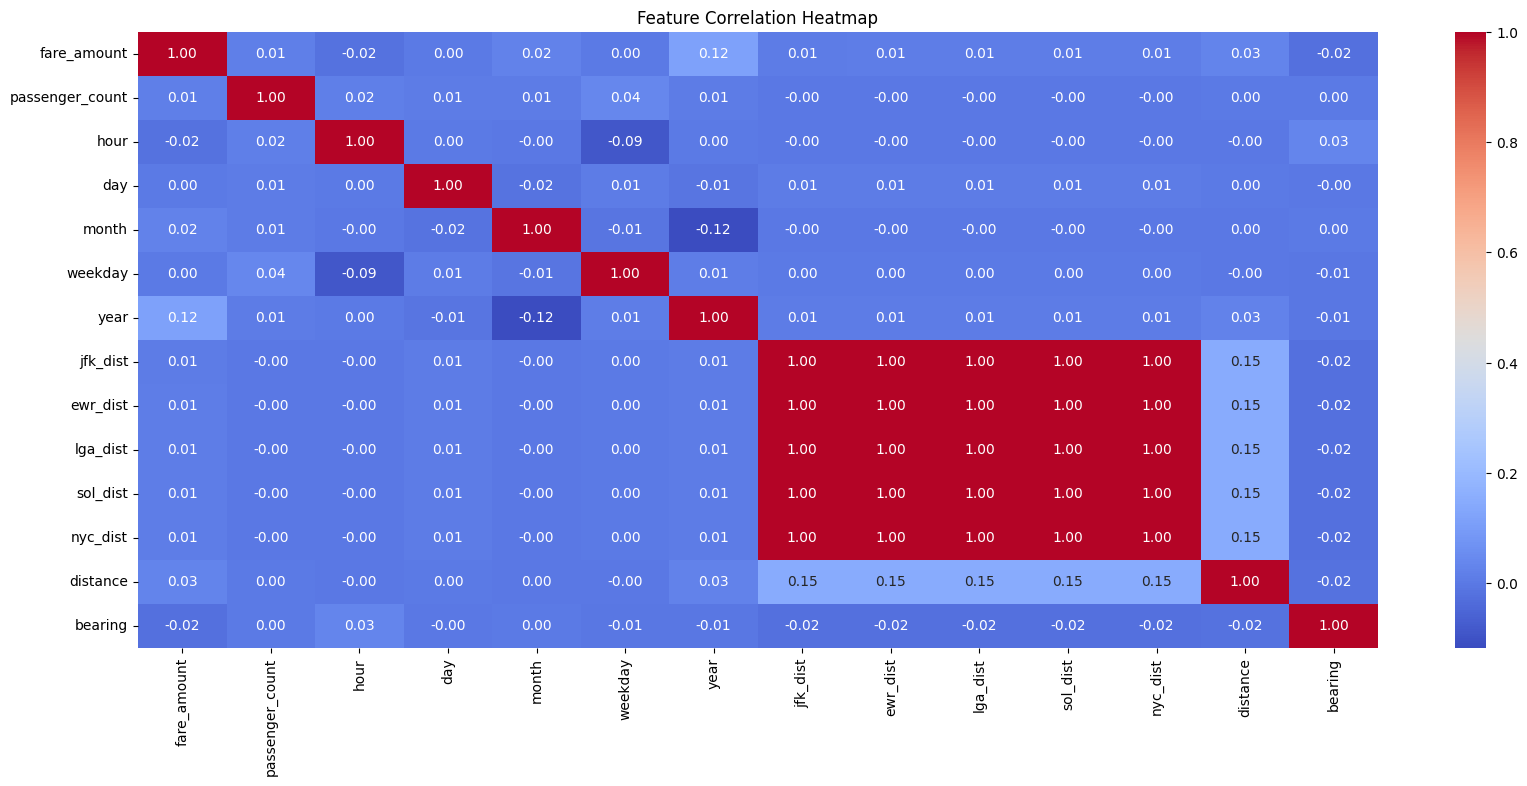

In [16]:
correlation_matrix = data.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    # Keep only numeric features
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

vif_df = calculate_vif(data)
print(vif_df)


            feature           VIF
0       fare_amount  3.480132e+00
1   passenger_count  2.663583e+00
2              hour  5.363196e+00
3               day  4.265784e+00
4             month  4.328089e+00
5           weekday  3.475788e+00
6              year  2.521785e+02
7          jfk_dist  4.492243e+05
8          ewr_dist  3.679352e+06
9          lga_dist  4.356652e+05
10         sol_dist  2.020938e+07
11         nyc_dist  1.086595e+07
12         distance  1.025673e+00
13          bearing  1.037164e+00
